In [72]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
                "pgf.texsystem": "pdflatex",
                'font.family': 'serif',
                'text.usetex': True,
                'pgf.rcfonts': False,
            })

In [90]:
exp_type = 'simulation'
exp = '20C'
exp_name = '2024_03_22-16_00_41' #pv
#exp_name = '2024_02_21-14_06' #10C

**Prepare structures and functions to plot everything we need**

In [91]:
folder_exp_dict = {'pv': 'PV_profile', 'pv2': 'PV_profile2', '20C': '20C_check_up', '10C': '10C_check_up'}

In [92]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [93]:
def plot_compared_data(dfs, 
                       variables: list, 
                       x_axes: list,
                       labels: list, 
                       x_label: str,
                       y_label: str,
                       markers: list,
                       line_styles: list,
                       title: str, 
                       colors=None, 
                       save_fig=False, 
                       fig_name='',
                       plot_type=''
                      ):
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
        
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        if plot_type == 'scatter':
            plt.scatter(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], s=0.1, rasterized=True)
        else:
            plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], markevery=3000, linestyle=line_styles[i])
    
    plt.ticklabel_format(style='plain')
    plt.tick_params(labelsize=16)
    plt.xlabel(x_label, size=18)
    plt.ylabel(y_label, size=18)
    
    plt.title(title, fontsize=20, y=1)
    
    if plot_type == 'scatter':
        plt.legend(markerscale=5, scatterpoints=5, fontsize=14)
    else:
        plt.legend(fontsize=12)
    
    if save_fig:
        plt.savefig(fig_name, format='svg', transparent=True, dpi=200)
    
    plt.show()

### RETRIEVE SIMULATION AND GROUND DATA

In [94]:
df_out = pd.read_csv(output_file)
df_out = df_out.iloc[1:]
df_out

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
1,0.0,1.0,1.0,4.149117,-3.9297,16.304784,4.137765,0.002790,0.002736,9758.833041,296.150332,0.043138
2,1.0,1.0,1.0,4.148961,-3.7463,15.543253,4.137765,0.002790,0.002736,9758.877428,296.150644,0.039358
3,2.0,1.0,1.0,4.148832,-3.5827,14.864019,4.137765,0.002790,0.002736,9758.919114,296.150938,0.036229
4,3.0,1.0,1.0,4.148830,-3.4729,14.408471,4.137765,0.002790,0.002736,9758.958470,296.151221,0.034340
5,4.0,1.0,1.0,4.148958,-3.4159,14.172427,4.137765,0.002790,0.002736,9758.996316,296.151498,0.033564
...,...,...,...,...,...,...,...,...,...,...,...,...
32792,34039.0,1.0,1.0,4.139364,-0.2797,1.157780,4.137821,0.002773,0.002716,9786.250808,296.354795,0.000434
32793,34040.0,1.0,1.0,4.139311,-0.2613,1.081602,4.137821,0.002773,0.002716,9786.220779,296.354570,0.000405
32794,34041.0,1.0,1.0,4.139342,-0.2727,1.128799,4.137821,0.002773,0.002716,9786.190634,296.354345,0.000422
32795,34042.0,1.0,1.0,4.139393,-0.2908,1.203735,4.137821,0.002773,0.002716,9786.160617,296.354122,0.000450


In [95]:
df_ground = pd.read_csv(ground_file)
df_ground 

,current,voltage,temperature,power,time
0,3.9297,4.1482,296.0498,16.301100,0.0
1,3.7463,4.1498,296.0563,15.546702,1.0
2,3.5827,4.1500,296.0306,14.868114,2.0
3,3.4729,4.1500,296.0145,14.412659,3.0
4,3.4159,4.1500,296.0650,14.175813,4.0
...,...,...,...,...,...
32791,0.2797,4.1500,296.5509,1.160901,34039.0
32792,0.2613,4.1500,296.5333,1.084197,34040.0
32793,0.2727,4.1500,296.5776,1.131909,34041.0
32794,0.2908,4.1501,296.5579,1.206755,34042.0


### PLOT COMPARED DATA

In [96]:
args_20c =[]

args_20c_T = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Temperature w/ circuital thermal model',
    'save_fig': True,
    'fig_name': '20C_T.svg',
    'colors': ['cyan', 'violet'],
    'plot_type': 'scatter'
}

args_20c_V = {
    'dfs': [df_ground, df_out], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[V]',
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Voltage',
    'save_fig': True,
    'fig_name': '20C_V.svg',
    'colors': ['cyan', 'violet'],
    'plot_type': 'scatter'
}

args_20c.append(args_20c_T)
args_20c.append(args_20c_V)

In [97]:
args_10c = {
    'dfs': [df_out, df_ground], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Ground'],
    'x_label': 'Time [s]',
    'y_label': '[°C]',
    'markers': ['o', 's'],
    'line_styles': ['-', '--'],
    'title': 'Voltage',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

In [98]:
args_pv2 = []

"""
args_pv2_V = {
    'dfs': [df_ground, df_out], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[V]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Voltage',
    'save_fig': True,
    'fig_name': 'PV2_V.svg',
    'colors': ['cyan', 'violet']
}

args_pv2_T_rc = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Temperature w/ circuital thermal model',
    'save_fig': True,
    'fig_name': 'PV2_T.svg',
    'colors': ['cyan', 'violet']
}
"""

args_pv2_T_mlp = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Temperature w/ MLP thermal model',
    'save_fig': True,
    'fig_name': 'PV2_T_mlp.svg',
    'colors': ['cyan', 'violet']
}

args_pv2.append(args_pv2_T_rc)
args_pv2.append(args_pv2_T_mlp)

In [99]:
args = {'pv': args_pv, '10C': args_10c, '20C': args_20c, 'pv2': args_pv2,}

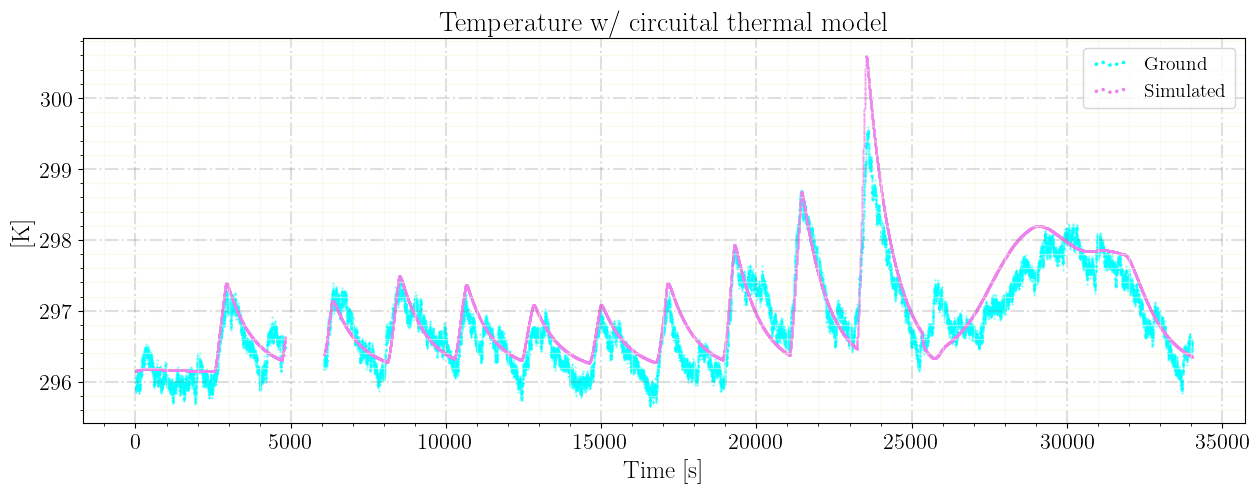

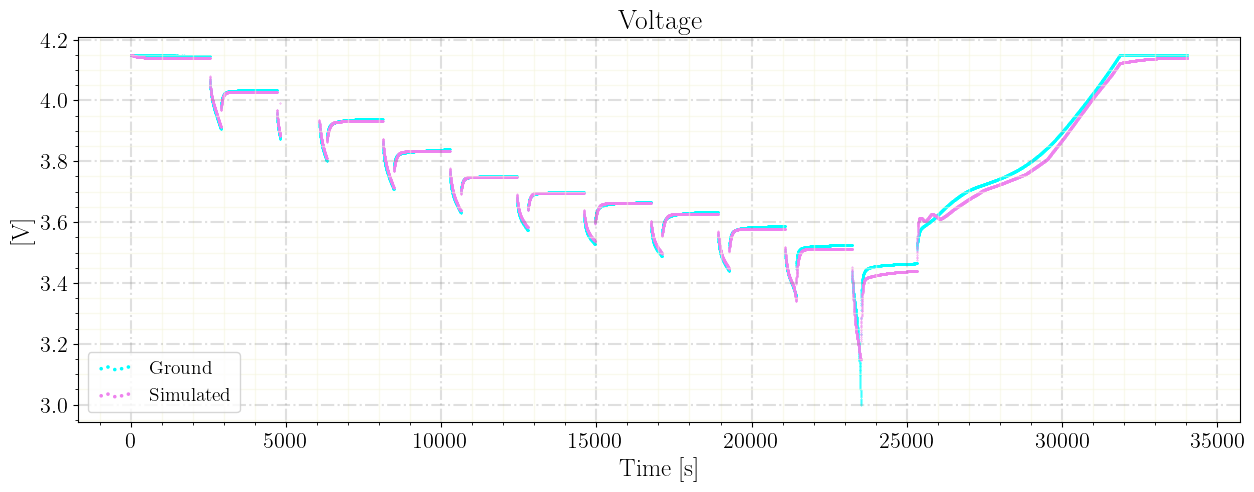

In [100]:
for arg in args[exp]:
    plot_compared_data(**arg)